# C3 Getting Started with Videos
de https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html

In [1]:
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt
import pixiedust

Pixiedust database opened successfully


## check if a camera is available
https://stackoverflow.com/questions/48049886/how-to-correctly-check-if-a-camera-is-available

In [ ]:
%%pixie_debugger
def testDevice(source):
   cap = cv2.VideoCapture(source) 
   if cap is None or not cap.isOpened():
        #using The string method "format"
        print('Warning: unable to open video source {0:d}'.format(source))    
   else :
        print('Video source {0:d} is ready for use'.format(source))

testDevice(0) # no printout
testDevice(1) # prints message
testDevice(2) # prints message

## Capture Video from Camera
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html#capture-video-from-camera

In [2]:
#video capture object
cap = cv2.VideoCapture(1)

In [3]:
%whos

Variable   Type            Data/Info
------------------------------------
cap        VideoCapture    <VideoCapture 0000011CFCE5FA50>
cv2        module          <module 'cv2' from 'C:\\A<...>\cv2.cp37-win_amd64.pyd'>
np         module          <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt        module          <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
time       module          <module 'time' (built-in)>


In [4]:
assert (cap.isOpened()),"Carture not INIT"
NR=cap.get(3)
NC=cap.get(4)
NR,NC

(640.0, 480.0)

In [5]:
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [32]:
#despues de release cap no esta inicializada
cap.open()
assert (cap.isOpened()),"Carture not INIT"

TypeError: VideoCapture.open() missing required argument 'filename' (pos 1)

## Saving a Video

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html#saving-a-video

In [7]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

In [8]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## Playing Video from file
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html#playing-video-from-file

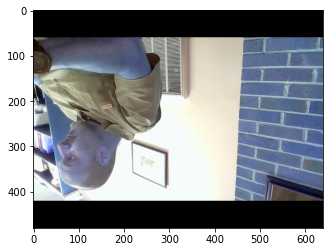

In [20]:
cap = cv2.VideoCapture('testAQ.avi')
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
%whos

Variable   Type            Data/Info
------------------------------------
cap        VideoCapture    <VideoCapture 0000021EB8235170>
cv2        module          <module 'cv2' from 'C:\\A<...>\cv2.cp37-win_amd64.pyd'>
frame      ndarray         480x640x3: 921600 elems, type `uint8`, 921600 bytes (900.0 kb)
np         module          <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
ret        bool            True


In [10]:
cap = cv2.VideoCapture('testAQ.avi')

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
#no se pq el ultimo frame del video da error ret=0 y tengo que verificarlo antes de imwhow
ret=True
while(cap.isOpened()):
    ret, frame = cap.read()
    #print(ret)

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('image',gray)
        time.sleep(1e-1)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [19]:
cap = cv2.VideoCapture('vtest.avi')
cap.isOpened()

False